# Project: Investigate the Soccer Dataset

I analyse the matches subset in the soccer dataset to answers the questions below:
<br>
Which teams have the best results over the time period of the dataset?
<br>
Do the results vary for home vs away matches? Is there any correlation between win ratio and where the match is played?
<br>
How are the results overtime? Which leagues have improved the most?

In [238]:
# Importing all relevant packages for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


In [239]:
# Read the CSV file and add/change the column names

labels = ['id', 'country_id','league_id', 'season', 'stage','date', 'match_id',
          'home_team_id', 'away_team_id', 'home_team_goal','away_team_goal', 
          'league', 'country']

df = pd.read_csv('matches.csv', sep=";", names = labels)


In [240]:
# Display a summary of the dataset

df.head()


,id,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,league,country
15723,15723,15722,15722,2008/2009,1,2008-08-10 00:00:00,506542,8020,1601,0,0,Poland Ekstraklasa,Poland
15737,15737,15722,15722,2008/2009,10,2008-10-24 00:00:00,506620,8028,1601,0,0,Poland Ekstraklasa,Poland
15743,15743,15722,15722,2008/2009,11,2008-11-02 00:00:00,506530,10265,1601,2,0,Poland Ekstraklasa,Poland
15765,15765,15722,15722,2008/2009,14,2008-11-15 00:00:00,506632,8244,1601,0,1,Poland Ekstraklasa,Poland
15788,15788,15722,15722,2008/2009,17,2008-12-06 00:00:00,506655,8025,1601,3,1,Poland Ekstraklasa,Poland


# Data Wrangling

In [241]:
# Check null values & data types

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 15723 to 1717
Data columns (total 13 columns):
id                25979 non-null int64
country_id        25979 non-null int64
league_id         25979 non-null int64
season            25979 non-null object
stage             25979 non-null int64
date              25979 non-null object
match_id          25979 non-null int64
home_team_id      25979 non-null int64
away_team_id      25979 non-null int64
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
league            25979 non-null object
country           25979 non-null object
dtypes: int64(9), object(4)
memory usage: 2.8+ MB


In [242]:
# Check duplicated values

df.duplicated().sum()


0

The dataset doesn't have a clear column for matches' results.
There are only columns for the scored goals in which can be used to determine the result of the match.
 I create a for loop to iterate over the goal scored and generate the result based on the goals differences


In [243]:
home_goals = df['home_team_goal']
away_goals = df['away_team_goal']

# creating an empty list to append the home results into
home_result =[]

for x , y   in zip(home_goals,away_goals):
    if x > y :
        home_result.append('w') #win
    elif x == y :
        home_result.append('d') #draw
    else:
        home_result.append('l') #loss       
        
# add a new column for the home results        
df['home_result'] = home_result

# dsiplay a summary of the new dataframe
df.head()


,id,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,league,country,home_result
15723,15723,15722,15722,2008/2009,1,2008-08-10 00:00:00,506542,8020,1601,0,0,Poland Ekstraklasa,Poland,d
15737,15737,15722,15722,2008/2009,10,2008-10-24 00:00:00,506620,8028,1601,0,0,Poland Ekstraklasa,Poland,d
15743,15743,15722,15722,2008/2009,11,2008-11-02 00:00:00,506530,10265,1601,2,0,Poland Ekstraklasa,Poland,w
15765,15765,15722,15722,2008/2009,14,2008-11-15 00:00:00,506632,8244,1601,0,1,Poland Ekstraklasa,Poland,l
15788,15788,15722,15722,2008/2009,17,2008-12-06 00:00:00,506655,8025,1601,3,1,Poland Ekstraklasa,Poland,w


In [244]:
# do the same for the away results
# creating an empty list to append the away results into
away_result = []

for x , y   in zip(home_goals,away_goals):
    if x < y :
        away_result.append('w') #win
    elif x == y :
        away_result.append('d') #draw
    else:
        away_result.append('l') #loss      

# add a new column for the away results 
df['away_result'] = away_result

# dsiplay a summary of the new dataframe
df.head()



,id,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,league,country,home_result,away_result
15723,15723,15722,15722,2008/2009,1,2008-08-10 00:00:00,506542,8020,1601,0,0,Poland Ekstraklasa,Poland,d,d
15737,15737,15722,15722,2008/2009,10,2008-10-24 00:00:00,506620,8028,1601,0,0,Poland Ekstraklasa,Poland,d,d
15743,15743,15722,15722,2008/2009,11,2008-11-02 00:00:00,506530,10265,1601,2,0,Poland Ekstraklasa,Poland,w,l
15765,15765,15722,15722,2008/2009,14,2008-11-15 00:00:00,506632,8244,1601,0,1,Poland Ekstraklasa,Poland,l,w
15788,15788,15722,15722,2008/2009,17,2008-12-06 00:00:00,506655,8025,1601,3,1,Poland Ekstraklasa,Poland,w,l


Now we need to merge the result in one column instead of 2 columns. What I do is creating 2 dataframes, one for the home results and another for the away results then join them together

In [245]:
# Creating a dataframe for the home results and selecting only relevant columns
df_home = df[['id', 'country','league', 'season', 'stage','date', 'match_id',
          'home_team_id', 'home_team_goal', 
          'league', 'country', 'home_result']].copy()

# Create a new column for the match type to distinguish home from away results
df_home['match_type'] = np.repeat('home', df_home.shape[0])

# rename the columns and remove the "home" word, so we can merge with away dataframe
df_home.rename(columns = {'home_team_id' : 'team_id', 'home_team_goal': 'goals', 'home_result' : 'result'}, inplace = True)

# dsiplay a summary of the new dataframe
df_home.head()


,id,country,league,season,stage,date,match_id,team_id,goals,league,country,result,match_type
15723,15723,Poland,Poland Ekstraklasa,2008/2009,1,2008-08-10 00:00:00,506542,8020,0,Poland Ekstraklasa,Poland,d,home
15737,15737,Poland,Poland Ekstraklasa,2008/2009,10,2008-10-24 00:00:00,506620,8028,0,Poland Ekstraklasa,Poland,d,home
15743,15743,Poland,Poland Ekstraklasa,2008/2009,11,2008-11-02 00:00:00,506530,10265,2,Poland Ekstraklasa,Poland,w,home
15765,15765,Poland,Poland Ekstraklasa,2008/2009,14,2008-11-15 00:00:00,506632,8244,0,Poland Ekstraklasa,Poland,l,home
15788,15788,Poland,Poland Ekstraklasa,2008/2009,17,2008-12-06 00:00:00,506655,8025,3,Poland Ekstraklasa,Poland,w,home


In [246]:
# Do the same for the away results
# Creating a dataframe for the away results and selecting only relevant columns
df_away = df[['id', 'country','league', 'season', 'stage','date', 'match_id',
          'away_team_id', 'away_team_goal', 
          'league', 'country', 'away_result']].copy()

# Create a new column for the match type to distinguish home from away results
df_away['match_type'] =  np.repeat('away', df_away.shape[0])

# rename the columns and remove the "home" word, so we can merge with home dataframe
df_away.rename(columns = {'away_team_id' : 'team_id', 'away_team_goal': 'goals', 'away_result' : 'result'}, inplace = True)

# dsiplay a summary of the new dataframe
df_away.head()


,id,country,league,season,stage,date,match_id,team_id,goals,league,country,result,match_type
15723,15723,Poland,Poland Ekstraklasa,2008/2009,1,2008-08-10 00:00:00,506542,1601,0,Poland Ekstraklasa,Poland,d,away
15737,15737,Poland,Poland Ekstraklasa,2008/2009,10,2008-10-24 00:00:00,506620,1601,0,Poland Ekstraklasa,Poland,d,away
15743,15743,Poland,Poland Ekstraklasa,2008/2009,11,2008-11-02 00:00:00,506530,1601,0,Poland Ekstraklasa,Poland,l,away
15765,15765,Poland,Poland Ekstraklasa,2008/2009,14,2008-11-15 00:00:00,506632,1601,1,Poland Ekstraklasa,Poland,w,away
15788,15788,Poland,Poland Ekstraklasa,2008/2009,17,2008-12-06 00:00:00,506655,1601,1,Poland Ekstraklasa,Poland,l,away


In [247]:
# Merge home and away dataframes and create a new data frame
df_all = df_home.append(df_away)

df_all.head()


,id,country,league,season,stage,date,match_id,team_id,goals,league,country,result,match_type
15723,15723,Poland,Poland Ekstraklasa,2008/2009,1,2008-08-10 00:00:00,506542,8020,0,Poland Ekstraklasa,Poland,d,home
15737,15737,Poland,Poland Ekstraklasa,2008/2009,10,2008-10-24 00:00:00,506620,8028,0,Poland Ekstraklasa,Poland,d,home
15743,15743,Poland,Poland Ekstraklasa,2008/2009,11,2008-11-02 00:00:00,506530,10265,2,Poland Ekstraklasa,Poland,w,home
15765,15765,Poland,Poland Ekstraklasa,2008/2009,14,2008-11-15 00:00:00,506632,8244,0,Poland Ekstraklasa,Poland,l,home
15788,15788,Poland,Poland Ekstraklasa,2008/2009,17,2008-12-06 00:00:00,506655,8025,3,Poland Ekstraklasa,Poland,w,home


In [248]:
# drop the id column
df_all.drop('id', axis = 1, inplace = True)


In [249]:
# save the new cleanded data to an new CSV
df_all.to_csv('clean_data.csv', index = False)


# Data Analysis

In [250]:
# reading and viewing the new csv file

df = pd.read_csv('clean_data.csv')
df.head()



,country,league,season,stage,date,match_id,team_id,goals,league.1,country.1,result,match_type
0,Poland,Poland Ekstraklasa,2008/2009,1,2008-08-10 00:00:00,506542,8020,0,Poland Ekstraklasa,Poland,d,home
1,Poland,Poland Ekstraklasa,2008/2009,10,2008-10-24 00:00:00,506620,8028,0,Poland Ekstraklasa,Poland,d,home
2,Poland,Poland Ekstraklasa,2008/2009,11,2008-11-02 00:00:00,506530,10265,2,Poland Ekstraklasa,Poland,w,home
3,Poland,Poland Ekstraklasa,2008/2009,14,2008-11-15 00:00:00,506632,8244,0,Poland Ekstraklasa,Poland,l,home
4,Poland,Poland Ekstraklasa,2008/2009,17,2008-12-06 00:00:00,506655,8025,3,Poland Ekstraklasa,Poland,w,home


We need now to creat columns to determine the actual win ratio for each club grouped by "season":
<br>
**win_ratio:** number of won matches / number of all matches played 
<br>
**home_win_ratio:** number of won "home" matches / number of all "home" matches played 
<br>
**away_win_ratio:** number of won "away" matches / number of all "away" matches played 


In [251]:
# create a column for total number of wins
df['total_wins'] = df.query('result == "w"').groupby(['team_id', 'season']).match_id.transform('count')

# create a column for total number of matches
df['total_matches'] = df.groupby(['team_id', 'season']).match_id.transform('count')

# create a column for total number of "home" matches
df['home_matches'] = df.query('match_type == "home"').groupby(['team_id', 'season']).match_id.transform('count')

# create a column for total number of "away" matches
df['away_matches'] = df.query('match_type == "away"').groupby(['team_id', 'season']).match_id.transform('count')

# create a column for total number of "home" won matches
df['home_wins'] = df.query('result == "w" and match_type == "home"').groupby(['team_id', 'season']).match_id.transform('count')

# create a column for total number of "away" won matches
df['away_wins'] = df.query('result == "w" and match_type == "away"').groupby(['team_id', 'season']).match_id.transform('count')

# calculate our win ratio custom columns based off the columns above
df['win_ratio'] = df['total_wins'] / df['total_matches']
df['home_win_ratio'] = df['home_wins'] / df['home_matches']
df['away_win_ratio'] = df['away_wins'] / df['away_matches']

# dsiplay a summary of the updated dataframe
df.head()



,country,league,season,stage,date,match_id,team_id,goals,league.1,country.1,...,match_type,total_wins,total_matches,home_matches,away_matches,home_wins,away_wins,win_ratio,home_win_ratio,away_win_ratio
0,Poland,Poland Ekstraklasa,2008/2009,1,2008-08-10 00:00:00,506542,8020,0,Poland Ekstraklasa,Poland,...,home,NaN,30,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Poland,Poland Ekstraklasa,2008/2009,10,2008-10-24 00:00:00,506620,8028,0,Poland Ekstraklasa,Poland,...,home,NaN,30,15.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Poland,Poland Ekstraklasa,2008/2009,11,2008-11-02 00:00:00,506530,10265,2,Poland Ekstraklasa,Poland,...,home,19.0,30,15.0,NaN,13.0,NaN,0.633333,0.866667,NaN
3,Poland,Poland Ekstraklasa,2008/2009,14,2008-11-15 00:00:00,506632,8244,0,Poland Ekstraklasa,Poland,...,home,NaN,30,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Poland,Poland Ekstraklasa,2008/2009,17,2008-12-06 00:00:00,506655,8025,3,Poland Ekstraklasa,Poland,...,home,11.0,30,15.0,NaN,8.0,NaN,0.366667,0.533333,NaN


In [252]:
# Remove null values and keep only relevant columns
df= df.query('win_ratio != "Nan"')[['season', 'league','team_id','win_ratio',
                                    'home_win_ratio','away_win_ratio','total_matches']]

# Remove duplicated values
df.drop_duplicates(inplace = True)


In [253]:
# Display a summary of statistical details
df.describe()



,team_id,win_ratio,home_win_ratio,away_win_ratio,total_matches
count,2943.000000,2943.000000,1480.000000,1463.000000,2943.000000
mean,10035.614679,0.374256,0.458955,0.291090,35.114509
std,14749.877773,0.153247,0.180951,0.161441,3.489735
min,1601.000000,0.078947,0.052632,0.052632,6.000000
25%,8467.000000,0.264706,0.315789,0.166667,34.000000
50%,8697.000000,0.342105,0.421053,0.263158,36.000000
75%,9925.000000,0.466667,0.578947,0.368421,38.000000
max,274581.000000,0.900000,1.000000,1.000000,38.000000


In [254]:
# Grouping the results by "Team" & "Season" and creating a new dataframe

df_results = df.groupby(['team_id', 'season']).first().reset_index()
df_results.head()


,team_id,season,league,win_ratio,home_win_ratio,away_win_ratio,total_matches
0,1601,2008/2009,Poland Ekstraklasa,0.300000,0.400000,0.200000,30
1,1601,2009/2010,Poland Ekstraklasa,0.533333,0.666667,0.400000,30
2,1601,2010/2011,Poland Ekstraklasa,0.333333,0.400000,0.266667,30
3,1601,2011/2012,Poland Ekstraklasa,0.533333,0.600000,0.466667,30
4,1601,2012/2013,Poland Ekstraklasa,0.266667,0.266667,0.266667,30


In [255]:
df_results.describe()

,team_id,win_ratio,home_win_ratio,away_win_ratio,total_matches
count,1481.000000,1481.000000,1480.000000,1463.000000,1481.000000
mean,10027.097907,0.373101,0.458955,0.291090,35.083052
std,14706.054037,0.153611,0.180951,0.161441,3.570599
min,1601.000000,0.078947,0.052632,0.052632,6.000000
25%,8467.000000,0.264706,0.315789,0.166667,34.000000
50%,8697.000000,0.342105,0.421053,0.263158,36.000000
75%,9927.000000,0.466667,0.578947,0.368421,38.000000
max,274581.000000,0.900000,1.000000,1.000000,38.000000


Our results dataframe is missing the team names, it only has the team id. We have another subset in our database that includes all team details that we can join with our current dataframe to get the club names

In [256]:
# Reading and viewing the teams details CSV file

labels = ['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name']
df_teams = pd.read_csv('team.csv', sep =';', names =labels)


In [257]:
# Checking null values
df_teams.info()

#there are 10 teams missing the fifa_api_id, and that's why i had to relay on the api_ id instead

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 299
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 14.0+ KB


In [258]:
#droping the fifa_api_id

df_teams.drop('team_fifa_api_id',axis = 1, inplace = True)

In [259]:
#Checking duplicated values, especially incase if there are some teams that have more than Id
value_counts = df_teams.team_long_name.value_counts()
value_counts

Polonia Bytom                   2
Royal Excel Mouscron            2
Widzew Łódź                     2
Córdoba CF                      1
União de Leiria, SAD            1
DSC Arminia Bielefeld           1
KV Oostende                     1
SC Freiburg                     1
Cesena                          1
KSV Cercle Brugge               1
Standard de Liège               1
Olympique de Marseille          1
CD Tenerife                     1
VfL Bochum                      1
Valenciennes FC                 1
CA Osasuna                      1
Athletic Club de Bilbao         1
Reading                         1
Arka Gdynia                     1
AZ                              1
Hull City                       1
Fulham                          1
SV Zulte-Waregem                1
Servette FC                     1
FC Bayern Munich                1
Falkirk                         1
Aberdeen                        1
Lierse SK                       1
Blackpool                       1
Sporting CP   

In [260]:
# dropping those teams to ensure the accuracy of our analysis
to_remove = value_counts[value_counts > 1].index
df_teams = df_teams[~df_teams.team_long_name.isin(to_remove)]


In [261]:
# Merging the results dataframe with the team details dataframe

df_results = pd.merge(df_results, df_teams, left_on = 'team_id', right_on = 'team_api_id')
df_results.head()


,team_id,season,league,win_ratio,home_win_ratio,away_win_ratio,total_matches,id,team_api_id,team_long_name,team_short_name
0,1601,2008/2009,Poland Ekstraklasa,0.300000,0.400000,0.200000,30,31446,1601,Ruch Chorzów,CHO
1,1601,2009/2010,Poland Ekstraklasa,0.533333,0.666667,0.400000,30,31446,1601,Ruch Chorzów,CHO
2,1601,2010/2011,Poland Ekstraklasa,0.333333,0.400000,0.266667,30,31446,1601,Ruch Chorzów,CHO
3,1601,2011/2012,Poland Ekstraklasa,0.533333,0.600000,0.466667,30,31446,1601,Ruch Chorzów,CHO
4,1601,2012/2013,Poland Ekstraklasa,0.266667,0.266667,0.266667,30,31446,1601,Ruch Chorzów,CHO


# Data Visulization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ba444df28>,
      dtype=object)

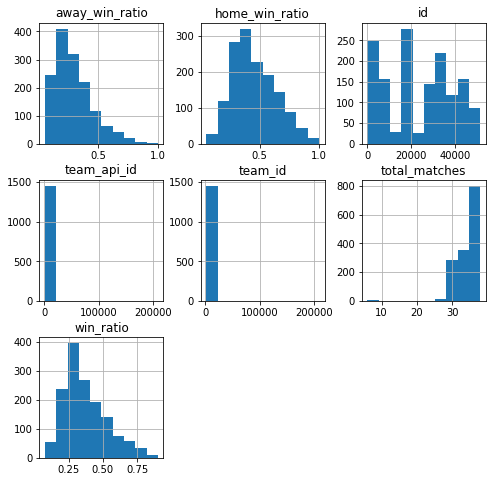

In [262]:
# Exploring the whole dataframe with histograms
df_results.hist(figsize = (8,8))

# 1: Which teams have the best win ratios?

First, we need to make sure to filter out teams that didn't play enough matches (less thatn the mean of total matches). Then, by sorting down by win ratio, grouping by team and plotting the data on a bar chart. We can see that **FC Barcelona** followed by **Real Madrid** have the best win ratio over the time period of the dataset

''

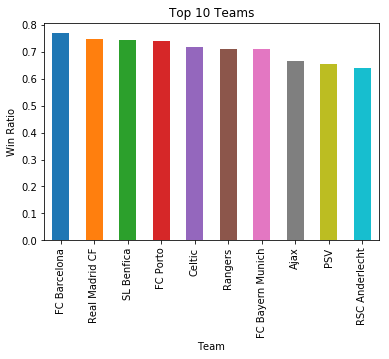

In [270]:
# Calculating the mean of total matches
total_matches_mean = df_results['total_matches'].mean()

# Keeping only teams that played statistically significant number of matches
df_best_10 = df_results.query('total_matches >= @total_matches_mean')

# Grouping by team name and creating a new dataframe for top ten teams
df_best_10 = df_results.groupby('team_long_name').mean().reset_index()

#Sorting by win ratio and selecting only top 10 teams
df_best_10 = df_best_10.sort_values(by = 'win_ratio', ascending = False).head(10)

#Plotting the data on a bar chart
df_best_10.plot(x = 'team_long_name', y = 'win_ratio', kind = 'bar')
plt.title('Top 10 Teams')
plt.xlabel('Team')
plt.ylabel('Win Ratio')
plt.legend().remove();

# 2: Do the results for top 10 teams vary for home vs away matches?

Yes, we can see clearly that all top 10 teams had better home win ratio than away win ratio

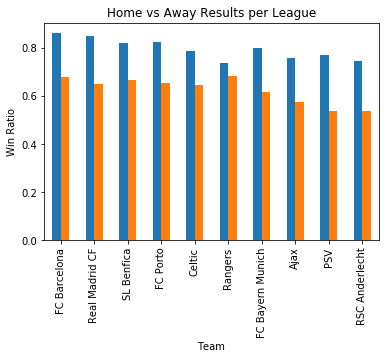

In [264]:
# Creating a bar chart for the top 10 teams broken down by home vs away win ratio
df_best_10.plot(x = 'team_long_name', y = ['home_win_ratio', 'away_win_ratio'], kind = 'bar')
plt.title('Home vs Away Results per League')
plt.xlabel('Team')
plt.ylabel('Win Ratio')
plt.legend().remove();


# 3: How about the whole results for home vs away matches?

The home results are definitely better than away results. It's clearly represented on the histogram below where the away_win_ratio results are skewed to left while the home results skewed to right.

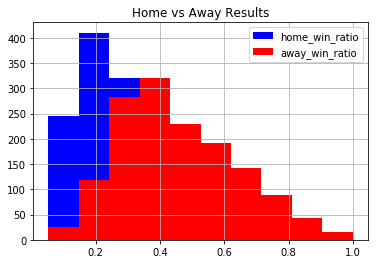

In [265]:
# Creating a histogram for home vs away results for all the teams in the dataset
df_results['away_win_ratio'].hist(color ='blue', label="home_win_ratio")
df_results['home_win_ratio'].hist(color = 'red', label="away_win_ratio")
plt.title('Home vs Away Results')
plt.legend();


# 4: Do specific leagues have different results?

The home win ratio is better than than the away win ratio in **all leagues** except the **Belgium Jupiler League** where the away win ratio outnumbered the home results

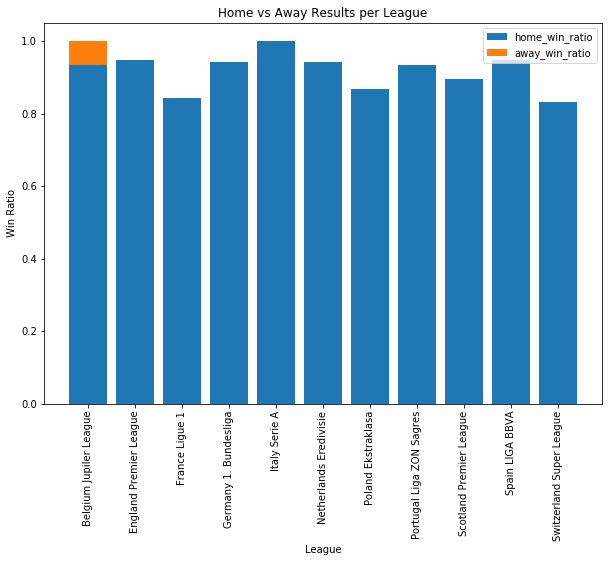

In [266]:
# Creating a stacked bar chart for home vs away results per League
plt.subplots(figsize=(10,7))
plt.bar(df_results['league'], df_results['home_win_ratio'], label="home_win_ratio", zorder=2)
plt.bar(df_results['league'], df_results['away_win_ratio'], label="away_win_ratio", zorder=1)
plt.xticks( rotation='vertical')
plt.title('Home vs Away Results per League')
plt.xlabel('League')
plt.ylabel('Win Ratio');
plt.legend();


# 5: How are the results over time/season?

There is no specific trend in results, it highly fluctuates from a season to season. As seen in the line chart below, **season 2013/2014** has the highest win ratio which means that specific teams were dominating the competition.

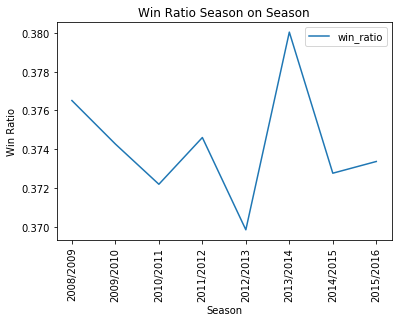

In [267]:
# Creating a line chart for win ratio season on season
df_season = df_results.groupby('season').win_ratio.mean().reset_index()
plt.plot(df_season['season'],df_season['win_ratio'])
plt.xticks( rotation='vertical')
plt.title('Win Ratio Season on Season')
plt.xlabel('Season')
plt.ylabel('Win Ratio');
plt.legend();

# 6: which leagues have improved the most over time?

**Scotland Premier League** has improved the most over the past 3 seasons in the dataset, followed by the **France Ligue 1** which picked up significantly since season 2010/2011

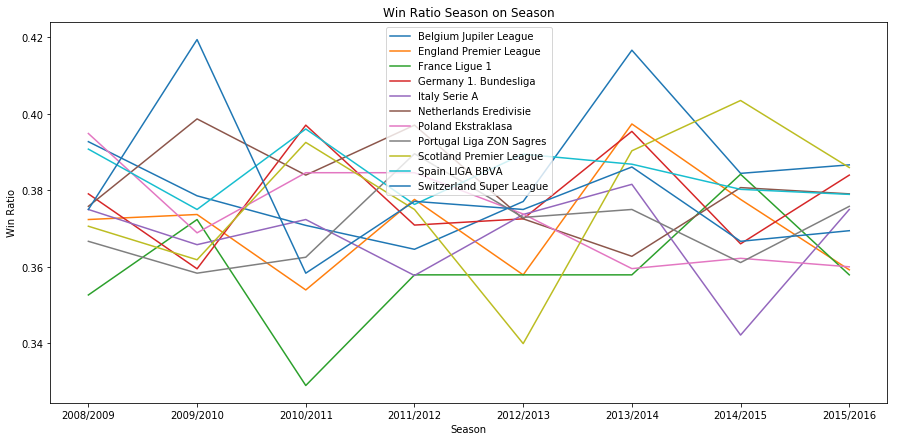

In [268]:
# Creating a line graph for win ratio broken down by league and season
df_s_l = df_results.groupby(['season','league']).win_ratio.mean().unstack()
plt.subplots(figsize=(15,7))
plt.plot(df_s_l)
plt.title('Win Ratio Season on Season')
plt.xlabel('Season')
plt.ylabel('Win Ratio');
plt.legend(df_s_l)


#  Limitations & Challenges

-  There weren't any duplicates or null values in the "matches" dataset for the relevant columns of my analysis, however there were definitely null values in the gambling columns but I didn't need nor use them for my analysis.
<br>
-  There were missing values when it comes to the number of played matches. Some teams played only 6 matches in which the average number of matches in each season is around 35 matches. Therefore, I had to make sure to not include those teams in my analysis when making conclusions, especially that I am relying on a ratio (win ratio) , which could result in misleading analysis and skewed the data. I filtered  and kept only teams that played matches greater than or equal the mean of total matches.
<br>
-  The main challenge in the 'matches' dataset was to get a full picture of a team results for both home and away matches. To overcome this challenge I had to create 2 dataframes, unstack the needed data and then re-joining them again, it did the trick.
<br>
-  There were 10 teams in the "Teams" subset that were missing the fifa_api_id, therefore, I had to relay on the team_api_id instead.
<br>
-  There were also 3 teams that had more than team_api_id, I had also to drop those rows to ensure the accuracy of the analysis and avoid duplicates in my clean results dataset

# Conclusion

1: **FC Barcelona** had the best results over the time period of the dataset, followed by **Read Madrid**.
<br>
2: There is always an advantage of playing home vs away matches, whereas the home results in the dataset are better than away results for all leagues except the **Belgium Jupiler League**.
<br>
3: There is no specific trend in overall win ratio results, it highly fluctuates from a season to season. However, **season 2013/2014** has the highest win ratio which means that specific teams were dominating the competition.
<br>
4: **Scotland Premier League** has improved the most over the past 3 seasons in the dataset, followed by the **France Ligue 1** which picked up significantly since season 2010/2011

In [269]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255